## load params and data, create and split Datasets, set checkpoint, init models, set trainer, train, save best model and metric path 

In [4]:
from Load_Train import run_multiple_models, test_trained_models, plot_all_results
import Models

models = [
    Models.EEGClassifier,
    # Models.MNISTNet,
    # Models.EEGNet,

    # Models.TCNModel_withBase,
    # Models.TCNAttentionModel_withBase,
    # Models.EEGTransformerLite_withBase,
    # Models.ESNet,
    ]

shared_parameters = {

    "data_path": "numpy_datasets/processed_eeg_data_ssvep.npz",
    # "data_path": "processed_eeg_data_eyes.npz",
    "OCCIPITAL_SLICE": slice(0, 8),
    "MAX_TIME": "00:00:15:00",
    "SUMMARY": True,    
    "MODEL_KWARGS": {
        "in_channels": 8,
        # "in_channels": 64,
        "num_classes": 6,
        "LR": 1e-4, # 1e-3
        "WEIGHT_DECAY": 0.0,   
    }
}

results, test_loader = run_multiple_models(models, shared_parameters)
test_results = test_trained_models(results, test_loader)
plot_all_results(results, test_results)

Loading data from: numpy_datasets/processed_eeg_data_ssvep.npz
Data loaded: X=(860, 8, 500), y=(860,)
Dataset split: Train=602, Val=129, Test=129
Dataloaders ready


ModuleNotFoundError: No module named 'Torch'

In [3]:
test_results = test_trained_models(results, test_loader)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Testing EEGClassifier_withBase...


Testing: |          | 0/? [00:00<?, ?it/s]


Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0 277  38   0   0   0]
 [  0  31 284   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


/home/gtenzing/skyforge/ml_bci/Project/test_project/Torch.py:156: RuntimeWarning: invalid value encountered in divide
  class_acc = cm.diagonal() / cm.sum(axis=1)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


EEGClassifier_withBase: Test accuracy = 0.890

Testing MNISTNet_withBase...


Testing: |          | 0/? [00:00<?, ?it/s]


Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0 310   4   0   1   0]
 [  1 158 152   0   4   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Error testing MNISTNet_withBase: Detected more unique values in `preds` than expected. Expected only 3 but found 4 in `target`.

Testing EEGNet_withBase...


Testing: |          | 0/? [00:00<?, ?it/s]


Confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0 265  50   0   0   0]
 [  0  48 267   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]
EEGNet_withBase: Test accuracy = 0.844

Testing complete for all models.




Plotting EEGClassifier_withBase: Test Accuracy = 0.890


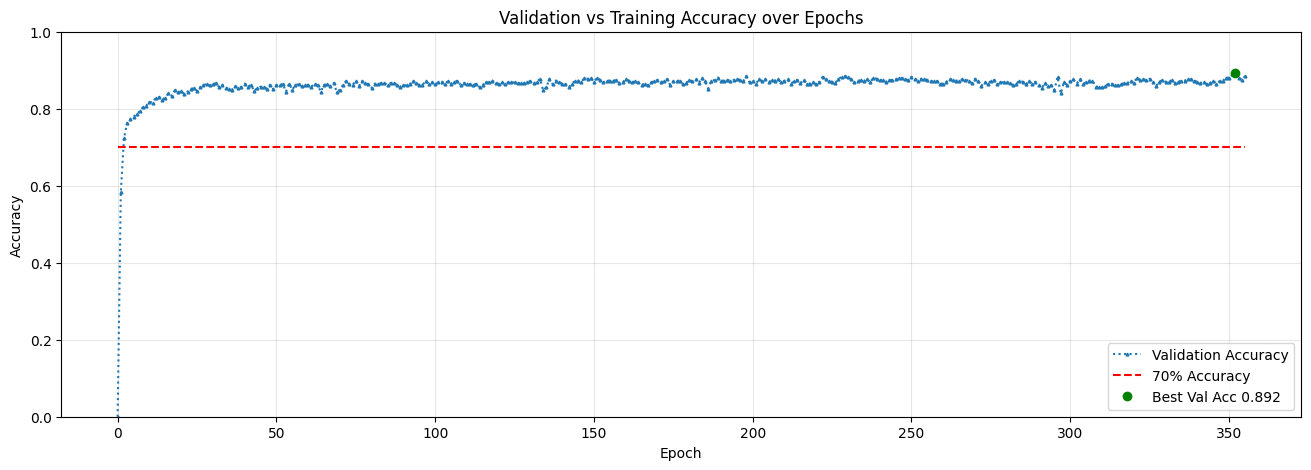

TypeError: 'NoneType' object is not subscriptable

In [4]:
plot_all_results(results, test_results)

## Plot any saved model 

In [ ]:
from Utils import plot_training_metrics

csv_path = "logs/EEGClassifier_Validation/version_7/metrics.csv"
plot_training_metrics(csv_path)